## Multivariate LSTM Forecast model for multiple outputs

Epoch 1/200
24/24 - 15s - loss: 0.2251 - val_loss: 0.2290 - 15s/epoch - 640ms/step
Epoch 2/200
24/24 - 0s - loss: 0.2092 - val_loss: 0.2124 - 166ms/epoch - 7ms/step
Epoch 3/200
24/24 - 0s - loss: 0.1905 - val_loss: 0.1929 - 158ms/epoch - 7ms/step
Epoch 4/200
24/24 - 0s - loss: 0.1629 - val_loss: 0.1661 - 166ms/epoch - 7ms/step
Epoch 5/200
24/24 - 0s - loss: 0.1194 - val_loss: 0.1415 - 154ms/epoch - 6ms/step
Epoch 6/200
24/24 - 0s - loss: 0.0980 - val_loss: 0.1442 - 153ms/epoch - 6ms/step
Epoch 7/200
24/24 - 0s - loss: 0.0863 - val_loss: 0.1457 - 155ms/epoch - 6ms/step
Epoch 8/200
24/24 - 0s - loss: 0.0790 - val_loss: 0.1452 - 153ms/epoch - 6ms/step
Epoch 9/200
24/24 - 0s - loss: 0.0737 - val_loss: 0.1431 - 167ms/epoch - 7ms/step
Epoch 10/200
24/24 - 0s - loss: 0.0701 - val_loss: 0.1407 - 155ms/epoch - 6ms/step
Epoch 11/200
24/24 - 0s - loss: 0.0684 - val_loss: 0.1372 - 162ms/epoch - 7ms/step
Epoch 12/200
24/24 - 0s - loss: 0.0648 - val_loss: 0.1333 - 149ms/epoch - 6ms/step
Epoch 13/200

Epoch 100/200
24/24 - 0s - loss: 0.0154 - val_loss: 0.0118 - 160ms/epoch - 7ms/step
Epoch 101/200
24/24 - 0s - loss: 0.0151 - val_loss: 0.0117 - 146ms/epoch - 6ms/step
Epoch 102/200
24/24 - 0s - loss: 0.0147 - val_loss: 0.0114 - 145ms/epoch - 6ms/step
Epoch 103/200
24/24 - 0s - loss: 0.0147 - val_loss: 0.0119 - 163ms/epoch - 7ms/step
Epoch 104/200
24/24 - 0s - loss: 0.0147 - val_loss: 0.0113 - 225ms/epoch - 9ms/step
Epoch 105/200
24/24 - 0s - loss: 0.0148 - val_loss: 0.0115 - 147ms/epoch - 6ms/step
Epoch 106/200
24/24 - 0s - loss: 0.0145 - val_loss: 0.0105 - 158ms/epoch - 7ms/step
Epoch 107/200
24/24 - 0s - loss: 0.0148 - val_loss: 0.0102 - 144ms/epoch - 6ms/step
Epoch 108/200
24/24 - 0s - loss: 0.0139 - val_loss: 0.0102 - 146ms/epoch - 6ms/step
Epoch 109/200
24/24 - 0s - loss: 0.0145 - val_loss: 0.0103 - 145ms/epoch - 6ms/step
Epoch 110/200
24/24 - 0s - loss: 0.0140 - val_loss: 0.0112 - 145ms/epoch - 6ms/step
Epoch 111/200
24/24 - 0s - loss: 0.0133 - val_loss: 0.0106 - 158ms/epoch - 7

Epoch 198/200
24/24 - 0s - loss: 0.0098 - val_loss: 0.0086 - 149ms/epoch - 6ms/step
Epoch 199/200
24/24 - 0s - loss: 0.0098 - val_loss: 0.0088 - 154ms/epoch - 6ms/step
Epoch 200/200
24/24 - 0s - loss: 0.0099 - val_loss: 0.0089 - 151ms/epoch - 6ms/step


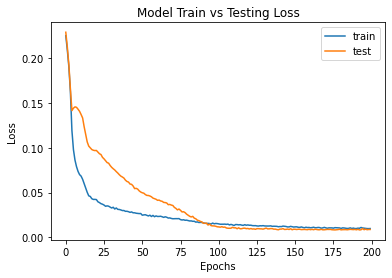

Normalized Test RMSE:  0.12355513656129376 0.11099935388887149 0.04934447028218431 0.07366230953128167
Test RMSE:  244.63913953770765 216.67075216500726 169.10349549166628 0.07366230953128167
Test R-squared:  0.8453287650630994 0.8915302093185351 0.9843750002452858 0.9602717601656098
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 1, 50)             11400     
                                                                 
 dropout_9 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_10 (LSTM)              (None, 1, 20)             5680      
                                                                 
 dropout_10 (Dropout)        (None, 1, 20)             0         
                                                                 
 lstm_11 (LSTM)              (Non

In [23]:
#from numpy import array

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dropout
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

#load dataset
dataset = read_csv('phy_cps.csv', header=0, index_col=0)
values = dataset.values
 
#integer encode wind direction, as it's the only categorical variable.
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
 
#ensure all data are float32 values
values = values.astype('float32')
 
#normalize input features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
 
#frame as supervised learning
n_hours = 1 
n_features = 6 
reframed = series_to_supervised(scaled, n_hours, 1)
values = reframed.values
# n_train_hours = 1936
n_train_hours = 1694
n_test = 484
train = values[:n_train_hours, :]
test = values[n_train_hours:n_train_hours+n_test, :]
out_test = values[n_train_hours+n_test:, :]
 

#split into input and outputs
n_obs = n_hours * n_features
train_X = train[:, :n_obs]
train_y = train[:, -n_features:(-n_features+4)] #+2 because of indexing madness.
test_X = test[:, :n_obs]
test_y = test[:, -n_features:(-n_features+4)]
 
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
 

#Need to output four values, not one.
#design network
model = Sequential()
model.add(LSTM(50, activation='relu',return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(20, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4))

model.compile(loss='mse', optimizer='adam')
 
#fit network
history = model.fit(train_X, train_y, epochs=200, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# Plot history
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.title('Model Train vs Testing Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 

#make a prediction
y_hat = model.predict(test_X)
 
#calculate RMSE - CHANGED to output RMSE for each variable.
norm_rmse_1 = sqrt(mean_squared_error(y_hat[:,0], test_y[:,0])) #RMSE for the first variable (Tank_1)
norm_rmse_2 = sqrt(mean_squared_error(y_hat[:,1], test_y[:,1])) #RMSE for the second variable (Tank_2)
norm_rmse_3 = sqrt(mean_squared_error(y_hat[:,2], test_y[:,2])) #RMSE for the third variable (Tank_3)
norm_rmse_4 = sqrt(mean_squared_error(y_hat[:,3], test_y[:,3])) #RMSE for the fourth variable (Pump_1)
print('Normalized Test RMSE: ', norm_rmse_1, norm_rmse_2, norm_rmse_3, norm_rmse_4)
    
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
inv_yhat = concatenate((y_hat, test_X[:,-2:]), axis=1) #changed 7 to 6
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0:4] #changed from 0 to 0:2. Should be first 2 columns that contain the predictions
 

#invert scaling for actual
test_y = test_y.reshape((len(test_y),4)) #changed 1 to 2
inv_y = concatenate((test_y, test_X[:,-2:]), axis=1) #changed 7 to 6
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0:4] #changed from 0 to 0:2. Should be first 2 columns that contain the predictions.
 

    
#calculate RMSE - CHANGED to output RMSE for each variable.
rmse_1 = sqrt(mean_squared_error(inv_y[:,0], inv_yhat[:,0])) #RMSE for the first variable (Tank_1)
rmse_2 = sqrt(mean_squared_error(inv_y[:,1], inv_yhat[:,1])) #RMSE for the second variable (Tank_2)
rmse_3 = sqrt(mean_squared_error(inv_y[:,2], inv_yhat[:,2])) #RMSE for the third variable (Tank_3)
rmse_4 = sqrt(mean_squared_error(inv_y[:,3], inv_yhat[:,3])) #RMSE for the fourth variable (Pump_1)

r_sq1 = r2_score(inv_y[:,0], inv_yhat[:,0])
r_sq2 = r2_score(inv_y[:,1], inv_yhat[:,1])
r_sq3 = r2_score(inv_y[:,2], inv_yhat[:,2])
r_sq4 = r2_score(inv_y[:,3], inv_yhat[:,3])

print('Test RMSE: ', rmse_1, rmse_2, rmse_3, rmse_4)

print("Test R-squared: ", r_sq1, r_sq2, r_sq3, r_sq4)
model.summary()

# import xlsxwriter

# # Create file (workbook) and worksheet
# outWorkbook = xlsxwriter.Workbook("out.xlsx")
# outSheet = outWorkbook.add_worksheet()

# # Declare data
# values = [[rmse_1,norm_rmse_1,r_sq1],
#           [rmse_2,norm_rmse_2,r_sq2],
#           [rmse_3,norm_rmse_3,r_sq3],
#           [rmse_4,norm_rmse_4,r_sq4]]

# # Write headers
# outSheet.write("C1", "Tank_1")
# outSheet.write("D1", "Tank_2")
# outSheet.write("E1", "Tank_3")
# outSheet.write("F1", "Pump_1")

# # Write data to file
# outSheet.write("C2",values[0][0])
# outSheet.write("C3",values[0][1])
# outSheet.write("C4",values[0][2])

# outSheet.write("D2",values[1][0])
# outSheet.write("D3",values[1][1])
# outSheet.write("D4",values[1][2])

# outSheet.write("E2",values[2][0])
# outSheet.write("E3",values[2][1])
# outSheet.write("E4",values[2][2])

# outSheet.write("F2",values[3][0])
# outSheet.write("F3",values[3][1])
# outSheet.write("F4",values[3][2])

# outWorkbook.close()

# Save the model to disk
model.save('multi_lstm_model.h5')
print('Model saved to disk')

In [2]:
out_test.shape

(241, 12)

### Box plot for rmse

           Tank_1      Tank_2      Tank_3     Pump_1
count   33.000000   33.000000   33.000000  33.000000
mean   144.161401  109.906095  134.719121   0.117114
std     29.680144   35.276328   34.676943   0.009327
min     88.629391   59.307521   74.722553   0.100214
25%    128.229447   79.751047  110.285824   0.109556
50%    142.568261  110.000502  126.947889   0.117160
75%    152.599295  128.335886  152.758458   0.124281
max    210.698327  197.403725  201.181122   0.132437


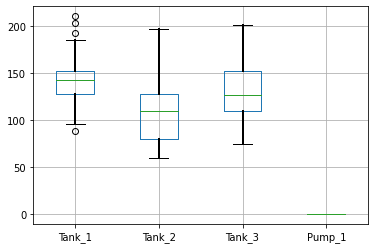

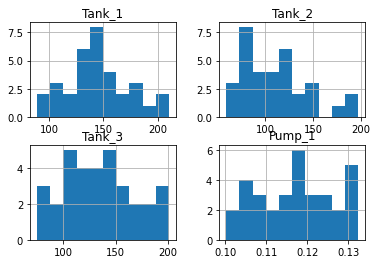

In [1]:
from pandas import DataFrame
from pandas import read_csv
from numpy import mean
from numpy import std
from matplotlib import pyplot
# load results file
results = read_csv('rmse_multiple_results.csv', header=0)
# descriptive stats
print(results.describe())
# box and whisker plot
results.boxplot(whiskerprops = dict(linestyle='-', linewidth=2))
pyplot.show()
# histogram
results.hist()
pyplot.show()

### Box plot for normalised rmse

          Tank_1     Tank_2     Tank_3     Pump_1
count  33.000000  33.000000  33.000000  33.000000
mean    0.072809   0.056304   0.039311   0.117114
std     0.014990   0.018072   0.010119   0.009327
min     0.044762   0.030383   0.021804   0.100214
25%     0.064762   0.040856   0.032181   0.109556
50%     0.072004   0.056353   0.037043   0.117160
75%     0.077070   0.065746   0.044575   0.124281
max     0.106413   0.101129   0.058705   0.132437


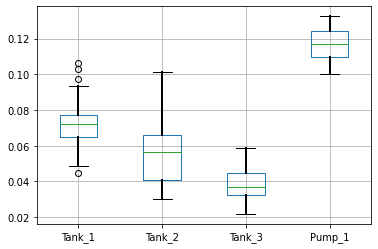

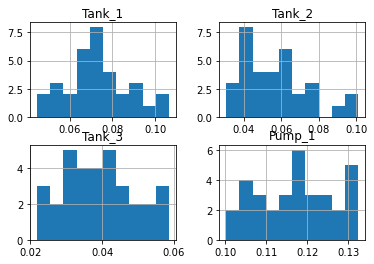

In [2]:
from pandas import DataFrame
from pandas import read_csv
from numpy import mean
from numpy import std
from matplotlib import pyplot
# load results file
results = read_csv('norm_rmse_multiple_results.csv', header=0)
# descriptive stats
print(results.describe())
# box and whisker plot
results.boxplot(whiskerprops = dict(linestyle='-', linewidth=2))
pyplot.show()
# histogram
results.hist()
pyplot.show()

### Box Plot for COefficient of Determination (R-Squared )

          Tank_1     Tank_2     Tank_3     Pump_1
count  33.000000  33.000000  33.000000  33.000000
mean    0.942453   0.970305   0.910426   0.937769
std     0.023750   0.019602   0.044893   0.009843
min     0.881927   0.912903   0.812304   0.920907
25%     0.938065   0.963188   0.891784   0.930348
50%     0.945940   0.972955   0.925264   0.938101
75%     0.956268   0.985784   0.943595   0.945875
max     0.979108   0.992138   0.974107   0.954713


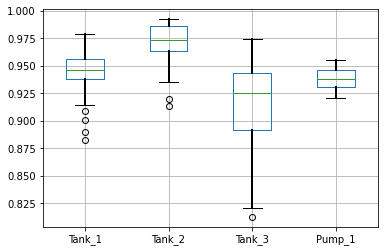

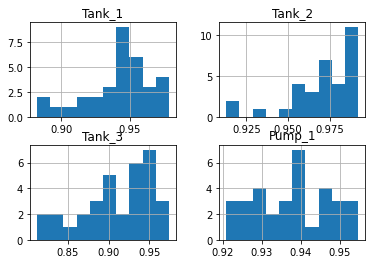

In [3]:
from pandas import DataFrame
from pandas import read_csv
from numpy import mean
from numpy import std
from matplotlib import pyplot
# load results file
results = read_csv('r_sq_multiple_results.csv', header=0)
# descriptive stats
print(results.describe())
# box and whisker plot
results.boxplot(whiskerprops = dict(linestyle='-', linewidth=2))
pyplot.show()
# histogram
results.hist()
pyplot.show()

In [31]:
import math
def rms(x,y):
    total = 0
    for i in range(len(x)):
        total += ((x[i]-y[i])**2)
    return math.sqrt(total/len(x))


p = [10,20,30,40]
q = [11,17,29,40]
print(rms(p,q))
val = [x for x in range(1000,10000,100)]
val2 = [k + 50 for k in val]
# del val2[3]
print(rms(val,val2))

1.6583123951777
50.0


### Training, Vaidating and Testing

Epoch 1/200
27/27 - 11s - loss: 0.2308 - val_loss: 0.1825 - 11s/epoch - 404ms/step
Epoch 2/200
27/27 - 0s - loss: 0.2119 - val_loss: 0.1677 - 253ms/epoch - 9ms/step
Epoch 3/200
27/27 - 0s - loss: 0.1891 - val_loss: 0.1493 - 189ms/epoch - 7ms/step
Epoch 4/200
27/27 - 0s - loss: 0.1526 - val_loss: 0.1239 - 198ms/epoch - 7ms/step
Epoch 5/200
27/27 - 0s - loss: 0.1151 - val_loss: 0.1094 - 156ms/epoch - 6ms/step
Epoch 6/200
27/27 - 0s - loss: 0.1001 - val_loss: 0.1009 - 149ms/epoch - 6ms/step
Epoch 7/200
27/27 - 0s - loss: 0.0899 - val_loss: 0.0973 - 168ms/epoch - 6ms/step
Epoch 8/200
27/27 - 0s - loss: 0.0833 - val_loss: 0.0941 - 181ms/epoch - 7ms/step
Epoch 9/200
27/27 - 0s - loss: 0.0776 - val_loss: 0.0894 - 170ms/epoch - 6ms/step
Epoch 10/200
27/27 - 0s - loss: 0.0719 - val_loss: 0.0856 - 182ms/epoch - 7ms/step
Epoch 11/200
27/27 - 0s - loss: 0.0664 - val_loss: 0.0790 - 167ms/epoch - 6ms/step
Epoch 12/200
27/27 - 0s - loss: 0.0614 - val_loss: 0.0745 - 166ms/epoch - 6ms/step
Epoch 13/200

Epoch 100/200
27/27 - 0s - loss: 0.0137 - val_loss: 0.0094 - 152ms/epoch - 6ms/step
Epoch 101/200
27/27 - 0s - loss: 0.0137 - val_loss: 0.0093 - 150ms/epoch - 6ms/step
Epoch 102/200
27/27 - 0s - loss: 0.0133 - val_loss: 0.0093 - 150ms/epoch - 6ms/step
Epoch 103/200
27/27 - 0s - loss: 0.0139 - val_loss: 0.0092 - 151ms/epoch - 6ms/step
Epoch 104/200
27/27 - 0s - loss: 0.0135 - val_loss: 0.0094 - 167ms/epoch - 6ms/step
Epoch 105/200
27/27 - 0s - loss: 0.0133 - val_loss: 0.0094 - 165ms/epoch - 6ms/step
Epoch 106/200
27/27 - 0s - loss: 0.0128 - val_loss: 0.0086 - 153ms/epoch - 6ms/step
Epoch 107/200
27/27 - 0s - loss: 0.0131 - val_loss: 0.0089 - 148ms/epoch - 5ms/step
Epoch 108/200
27/27 - 0s - loss: 0.0136 - val_loss: 0.0087 - 151ms/epoch - 6ms/step
Epoch 109/200
27/27 - 0s - loss: 0.0129 - val_loss: 0.0084 - 166ms/epoch - 6ms/step
Epoch 110/200
27/27 - 0s - loss: 0.0134 - val_loss: 0.0090 - 149ms/epoch - 6ms/step
Epoch 111/200
27/27 - 0s - loss: 0.0127 - val_loss: 0.0089 - 198ms/epoch - 7

Epoch 198/200
27/27 - 0s - loss: 0.0097 - val_loss: 0.0054 - 166ms/epoch - 6ms/step
Epoch 199/200
27/27 - 0s - loss: 0.0099 - val_loss: 0.0049 - 164ms/epoch - 6ms/step
Epoch 200/200
27/27 - 0s - loss: 0.0096 - val_loss: 0.0049 - 152ms/epoch - 6ms/step


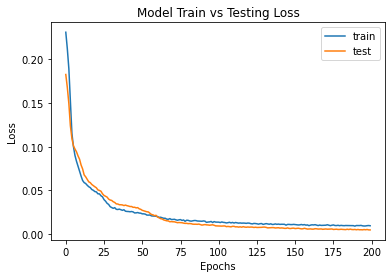

Normalized Test RMSE:  0.08712747978012453 0.0568356547561639 0.029662238214883264 0.08804199905484338
Test RMSE:  172.51239199148853 110.94320407870867 101.65248417556012 0.08804199905484338
Test R-squared:  0.9213986552455519 0.9724905392266853 0.9534886081309116 0.9648979973512987
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 50)             11400     
                                                                 
 dropout_12 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_13 (LSTM)              (None, 1, 20)             5680      
                                                                 
 dropout_13 (Dropout)        (None, 1, 20)             0         
                                                                 
 lstm_14 (LSTM)              (Non

In [36]:
#from numpy import array

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dropout
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

#load dataset
dataset = read_csv('phy_cps.csv', header=0, index_col=0)
values = dataset.values
 
#integer encode wind direction, as it's the only categorical variable.
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
 
#ensure all data are float32 values
values = values.astype('float32')
 
#normalize input features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
 
#frame as supervised learning
n_hours = 1
n_features = 6 
reframed = series_to_supervised(scaled, n_hours, 1)
values = reframed.values
n_train_hours = 1936
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
 

#split into input and outputs
n_obs = n_hours * n_features
train_X = train[:, :n_obs]
train_y = train[:, -n_features:(-n_features+4)] #+2 because of indexing madness.
test_X = test[:, :n_obs]
test_y = test[:, -n_features:(-n_features+4)]
 
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
 

#Need to output four values, not one.
#design network
model = Sequential()
model.add(LSTM(50, activation='relu',return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(20, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4))

model.compile(loss='mse', optimizer='adam')
 
#fit network
history = model.fit(train_X, train_y, epochs=200, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# Plot history
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.title('Model Train vs Testing Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 

#make a prediction
y_hat = model.predict(test_X)
 
#calculate RMSE - CHANGED to output RMSE for each variable.
norm_rmse_1 = sqrt(mean_squared_error(y_hat[:,0], test_y[:,0])) #RMSE for the first variable (Tank_1)
norm_rmse_2 = sqrt(mean_squared_error(y_hat[:,1], test_y[:,1])) #RMSE for the second variable (Tank_2)
norm_rmse_3 = sqrt(mean_squared_error(y_hat[:,2], test_y[:,2])) #RMSE for the third variable (Tank_3)
norm_rmse_4 = sqrt(mean_squared_error(y_hat[:,3], test_y[:,3])) #RMSE for the fourth variable (Pump_1)
print('Normalized Test RMSE: ', norm_rmse_1, norm_rmse_2, norm_rmse_3, norm_rmse_4)
    
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
inv_yhat = concatenate((y_hat, test_X[:,-2:]), axis=1) #changed 7 to 6
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0:4] #changed from 0 to 0:2. Should be first 2 columns that contain the predictions
 

#invert scaling for actual
test_y = test_y.reshape((len(test_y),4)) #changed 1 to 2
inv_y = concatenate((test_y, test_X[:,-2:]), axis=1) #changed 7 to 6
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0:4] #changed from 0 to 0:2. Should be first 2 columns that contain the predictions.
 

    
#calculate RMSE - CHANGED to output RMSE for each variable.
rmse_1 = sqrt(mean_squared_error(inv_y[:,0], inv_yhat[:,0])) #RMSE for the first variable (Tank_1)
rmse_2 = sqrt(mean_squared_error(inv_y[:,1], inv_yhat[:,1])) #RMSE for the second variable (Tank_2)
rmse_3 = sqrt(mean_squared_error(inv_y[:,2], inv_yhat[:,2])) #RMSE for the third variable (Tank_3)
rmse_4 = sqrt(mean_squared_error(inv_y[:,3], inv_yhat[:,3])) #RMSE for the fourth variable (Pump_1)

r_sq1 = r2_score(inv_y[:,0], inv_yhat[:,0])
r_sq2 = r2_score(inv_y[:,1], inv_yhat[:,1])
r_sq3 = r2_score(inv_y[:,2], inv_yhat[:,2])
r_sq4 = r2_score(inv_y[:,3], inv_yhat[:,3])

print('Test RMSE: ', rmse_1, rmse_2, rmse_3, rmse_4)

print("Test R-squared: ", r_sq1, r_sq2, r_sq3, r_sq4)
model.summary()

# Save the model to disk
model.save('multi_lstm_model.h5')
print('Model saved to disk')


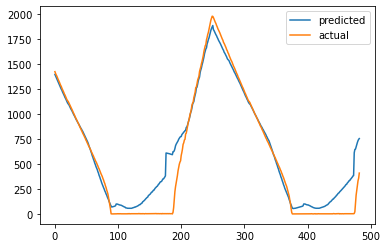

In [38]:
pyplot.plot(inv_yhat[0:500,0], label='predicted')
pyplot.plot(inv_y[0:500,0], label='actual')
pyplot.legend()
pyplot.show()

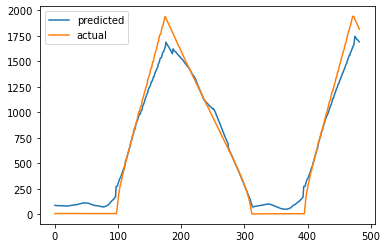

In [39]:
pyplot.plot(inv_yhat[0:500,1], label='predicted')
pyplot.plot(inv_y[0:500,1], label='actual')
pyplot.legend()
pyplot.show()

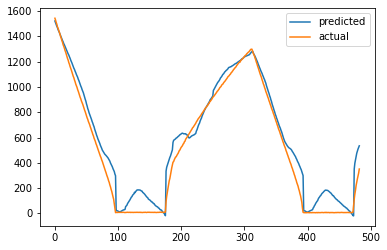

In [43]:
pyplot.plot(inv_yhat[0:500,2], label='predicted')
pyplot.plot(inv_y[0:500,2], label='actual')
pyplot.legend()
pyplot.show()

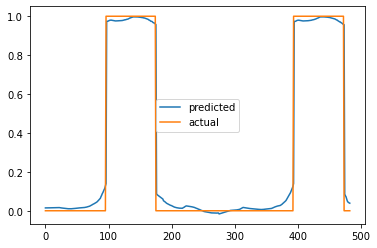

In [44]:
pyplot.plot(inv_yhat[0:500,3], label='predicted')
pyplot.plot(inv_y[0:500,3], label='actual')
pyplot.legend()
pyplot.show()

In [42]:
inv_yhat.shape

(483, 4)

### Load saved model

In [22]:
from keras.models import load_model

model = load_model('multi_lstm_model.h5')

#split into input and outputs
# n_obs = n_hours * n_features

test_X = out_test[:, :n_obs]
test_y = out_test[:, -n_features:(-n_features+4)]

test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

# Make a prediction
yhat = model.predict(test_X)

#calculate RMSE - CHANGED to output RMSE for each variable.
norm_rmse_1 = sqrt(mean_squared_error(y_hat[:241,0], test_y[:,0])) #RMSE for the first variable (Tank_1)
norm_rmse_2 = sqrt(mean_squared_error(y_hat[:241,1], test_y[:,1])) #RMSE for the second variable (Tank_2)
norm_rmse_3 = sqrt(mean_squared_error(y_hat[:241,2], test_y[:,2])) #RMSE for the third variable (Tank_3)
norm_rmse_4 = sqrt(mean_squared_error(y_hat[:241,3], test_y[:,3])) #RMSE for the fourth variable (Pump_1)
print('Normalized Test RMSE: ', norm_rmse_1, norm_rmse_2, norm_rmse_3, norm_rmse_4)
    
# test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
# inv_yhat = concatenate((y_hat, test_X[:,-2:]), axis=1) #changed 7 to 6
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0:4] #changed from 0 to 0:2. Should be first 2 columns that contain the predictions
 

# #invert scaling for actual
# test_y = test_y.reshape((len(test_y),4)) #changed 1 to 2
# inv_y = concatenate((test_y, test_X[:,-2:]), axis=1) #changed 7 to 6
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0:4] #changed from 0 to 0:2. Should be first 2 columns that contain the predictions.
 

    
# #calculate RMSE - CHANGED to output RMSE for each variable.
# rmse_1 = sqrt(mean_squared_error(inv_y[:,0], inv_yhat[:,0])) #RMSE for the first variable (Tank_1)
# rmse_2 = sqrt(mean_squared_error(inv_y[:,1], inv_yhat[:,1])) #RMSE for the second variable (Tank_2)
# rmse_3 = sqrt(mean_squared_error(inv_y[:,2], inv_yhat[:,2])) #RMSE for the third variable (Tank_3)
# rmse_4 = sqrt(mean_squared_error(inv_y[:,3], inv_yhat[:,3])) #RMSE for the fourth variable (Pump_1)

# r_sq1 = r2_score(inv_y[:,0], inv_yhat[:,0])
# r_sq2 = r2_score(inv_y[:,1], inv_yhat[:,1])
# r_sq3 = r2_score(inv_y[:,2], inv_yhat[:,2])
# r_sq4 = r2_score(inv_y[:,3], inv_yhat[:,3])

# print('Test RMSE: ', rmse_1, rmse_2, rmse_3, rmse_4)

# print("Test R-squared: ", r_sq1, r_sq2, r_sq3, r_sq4)


Normalized Test RMSE:  0.3467653732790489 0.3344888502224231 0.1508382847493114 0.6543487528261706


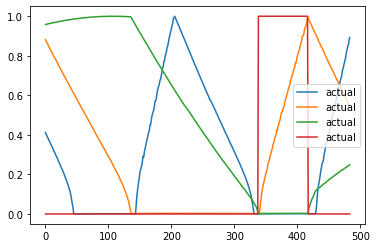

In [35]:
pyplot.plot(test_y[:,], label='actual')
pyplot.legend()
pyplot.show()